This assignment includes the following tasks:

- Data Preparation:

Unzip the dataset using appropriate functions and rename it to "Netflix_shows_movies."

- Data Cleaning:

Address missing values in the dataset.

- Data Exploration:

Perform various data exploration tasks, including describing the data and conducting statistical analysis.

- Data Visualization:

Create visualizations to represent the following:
Most watched genres.
Ratings distribution.


### 1. Load the Data

In [1]:
# Import required libraries
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For data visualization

In [2]:
# Load the netflix data and check the first 5 recprds
netflix_data = pd.read_csv("data/netflix_data.csv")
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### 2. Data Cleaning

#### a. Check no of columns and rows

In [3]:
# compute the number of rows in the dataset
rows = len(netflix_data.axes[0])
 
# compute the number of columns in the dataset
cols = len(netflix_data.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  6234
Number of Columns:  12


#### b. Address missing values

In [4]:
# Check for missing values in each column
print(netflix_data.isnull().sum())

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


The "director", "cast", "country", "date_added" and the "rating" columns all have missing values. 

- director: 1969 missing values
- cast: 570 missing values
- country: 476 missing values
- date_added: 11 missing values
- rating: 10 missing values





To address this, we might consider a few options. First, if the missing values are few, as in the case of "date_added" and "rating" columns, we can drop the missing values. The other option is to fill the missing values with a placeholder or a summary statistic such as the most common one. Lastly, we can impute with mean, mode or median for the numeric columns with missing values. More information on handling missing values can be found on the official pandas documentation: [https://pandas.pydata.org/docs/user_guide/missing_data.html]. Or on this useful article on medium [https://learner-cares.medium.com/handy-pandas-python-library-for-handling-missing-values-dc5f0d1ebf82]

In [5]:
# First we check the data type for each column
data_types = netflix_data.dtypes
print(data_types)

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [6]:
# We will use a placeholder to fill in the missing values for director, cast and country woth unknown
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

In [7]:
# Fill in the missing values for date and rating columns with 'Not Available' and Unrated' respectively
netflix_data['date_added'].fillna('Not Available', inplace=True)
netflix_data['rating'].fillna('Unrated', inplace=True)

In [8]:
# Convert 'date_added' to datetime format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

In [9]:
# Confirm the missing values have been handled
cleaned_netflix_data = netflix_data.isnull().sum()
cleaned_netflix_data

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      11
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

### 3. Data Exploration

In [16]:
# Count unique values in 'type', 'rating', and 'listed_in' columns
type_counts = netflix_data['type'].value_counts()
print("\nCounts of Types:\n", type_counts)


Counts of Types:
 Movie      4265
TV Show    1969
Name: type, dtype: int64


There are 4265 movies and 1969 Tv shows in our dataset. Next, we check the top 10 genres.


Top 10 Genres:
 International Movies      1927
Dramas                    1623
Comedies                  1113
International TV Shows    1001
Documentaries              668
TV Dramas                  599
Action & Adventure         597
Independent Movies         552
TV Comedies                436
Thrillers                  392
Name: listed_in, dtype: int64


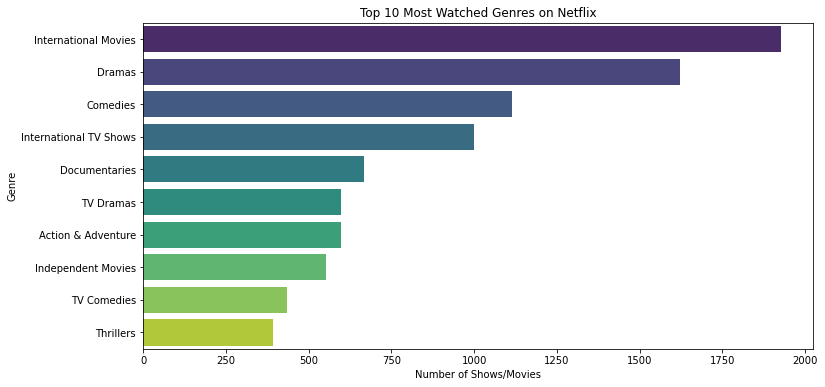

In [19]:
# Count the top 10 genres in 'listed_in'
genre_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts().head(10)
print("\nTop 10 Genres:\n", genre_counts)

# Visualize this in a bar chart
import seaborn as sns
genre_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts().head(10)

# Plotting the top 10 genres as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Genre')
plt.show()

### 4. Data Visualization